In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns 

In [41]:
df = pd.read_csv('diamonds.csv')   ##load data

df.head(11)      ##view first 10

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [42]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [43]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


/Users/pu_mac_10_/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skewness of the Price in the dataset is 1.618395283383529


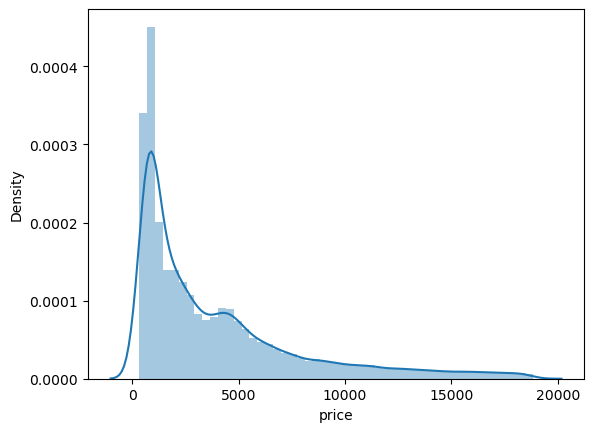

In [44]:
sns.distplot(df['price'])
print("The skewness of the Price in the dataset is {}".format(df['price'].skew()))

Skewness: 0.11529585821715065


/Users/pu_mac_10_/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

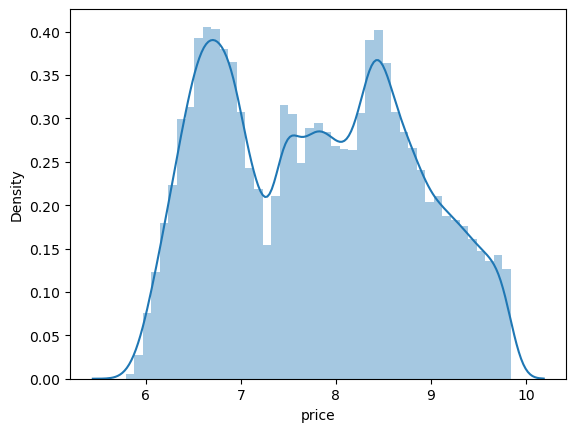

In [45]:
# Transforming the target variable to check if its closer to normal
target = np.log(df['price'])
print("Skewness: {}".format(target.skew()))
sns.distplot(target)

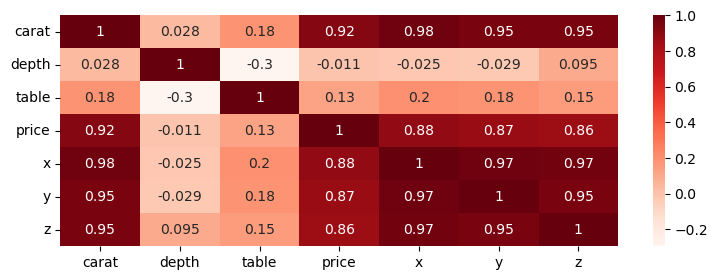

In [46]:
# Using Pearson Correlation 
plt.figure(figsize=(9,3))
cor = df.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

In [47]:
# correlation with output variable 
cor_target = abs(cor["price"])

# Selecting highly correlated features 
relevent_features = cor_target[cor_target>0.5]
relevent_features

carat    0.921591
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

In [48]:
df.drop(['depth', 'table'], axis=1, inplace=True)


In [49]:
df.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [50]:
# Encoding the categorical data 
# Encoding the independent variables
dummy_cut = pd.get_dummies(df['cut'],drop_first=True)   # drop_first to avoid the dummy variable trap
df = pd.concat([df, dummy_cut], axis=1)
df = df.drop('cut',axis=1)
df.head()

,carat,color,clarity,price,x,y,z,Good,Ideal,Premium,Very Good
0,0.23,E,SI2,326,3.95,3.98,2.43,0,1,0,0
1,0.21,E,SI1,326,3.89,3.84,2.31,0,0,1,0
2,0.23,E,VS1,327,4.05,4.07,2.31,1,0,0,0
3,0.29,I,VS2,334,4.20,4.23,2.63,0,0,1,0
4,0.31,J,SI2,335,4.34,4.35,2.75,1,0,0,0


In [51]:
dummy_color = pd.get_dummies(df['color'], drop_first=True)   
df = pd.concat([df, dummy_color], axis=1)
df = df.drop('color',axis=1)
df.head()

,carat,clarity,price,x,y,z,Good,Ideal,Premium,Very Good,E,F,G,H,I,J
0,0.23,SI2,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0
1,0.21,SI1,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0
2,0.23,VS1,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0
3,0.29,VS2,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0
4,0.31,SI2,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1


In [52]:
dummy_clarity = pd.get_dummies(df['clarity'], drop_first=True)
df = pd.concat([df, dummy_clarity], axis=1)
df = df.drop('clarity', axis=1)
df.head()

,carat,price,x,y,z,Good,Ideal,Premium,Very Good,E,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,326,3.95,3.98,2.43,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,326,3.89,3.84,2.31,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,327,4.05,4.07,2.31,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,334,4.20,4.23,2.63,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,335,4.34,4.35,2.75,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [53]:
order = df.columns.to_list()
order

['carat',
 'price',
 'x',
 'y',
 'z',
 'Good',
 'Ideal',
 'Premium',
 'Very Good',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'IF',
 'SI1',
 'SI2',
 'VS1',
 'VS2',
 'VVS1',
 'VVS2']

In [54]:
order = ['carat',
 'x',
 'y',
 'z',
 'Good',
 'Ideal',
 'Premium',
 'Very Good',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'IF',
 'SI1',
 'SI2',
 'VS1',
 'VS2',
 'VVS1',
 'VVS2',
  'price']

In [55]:
df = df[order]

In [56]:
df.head()

,carat,x,y,z,Good,Ideal,Premium,Very Good,E,F,...,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,price
0,0.23,3.95,3.98,2.43,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,326
1,0.21,3.89,3.84,2.31,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,326
2,0.23,4.05,4.07,2.31,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,327
3,0.29,4.20,4.23,2.63,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,334
4,0.31,4.34,4.35,2.75,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,335


In [60]:
from sklearn.model_selection import train_test_split

# Defining the independent and dependent variables
X= df.drop(["price"],axis =1)
y= df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score, mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [62]:
# making predictions
y_pred = regressor.predict(X_test)

In [63]:
y_pred

array([ -24.51263664, 2564.99941543,  712.97592966, ..., 5942.05615865,
       8677.84366538, 4370.02962729])

In [64]:
mlr_score = regressor.score(X_test, y_test)